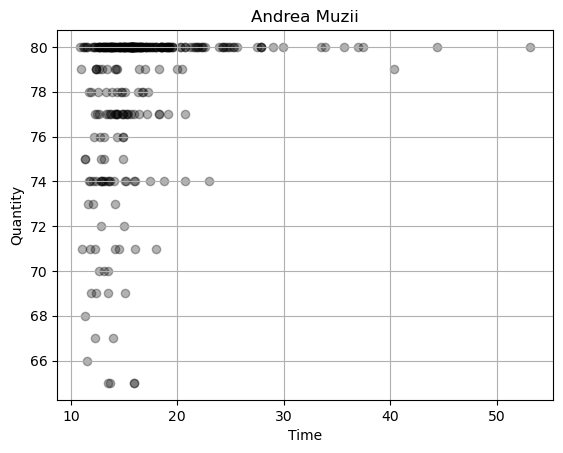

               80       47.26
count  304.000000  304.000000
mean    78.088816   16.526151
std      3.336270    5.245910
min     65.000000   10.820000
25%     77.000000   13.497500
50%     80.000000   15.240000
75%     80.000000   17.512500
max     80.000000   53.190000


C:\Users\emanu\AppData\Local\Temp\ipykernel_36904\1190831452.py:31: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


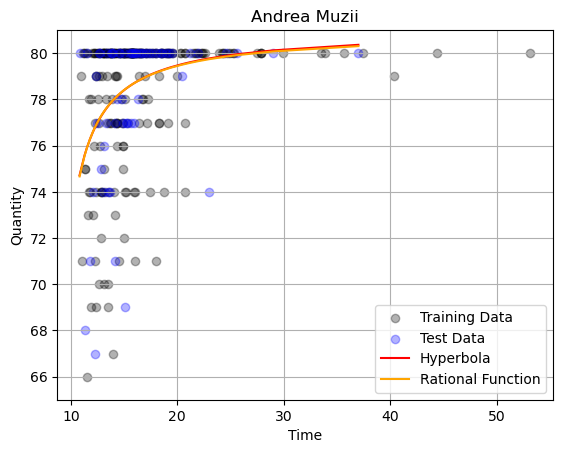

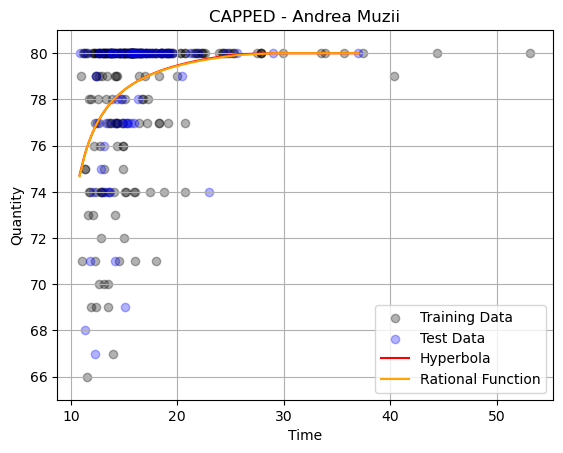


HYPERBOLIC
R-Squared: 0.1698992801837419
Mean Squared Error: 8.890148125698845
Mean Absolute Error: 2.0580962757133974
Median Absolute Error: 1.3679889042052389
RMSE: 2.981635142954088

RATIONAL
R-Squared: 0.16890988535410467
Mean Squared Error: 8.90074426949236
Mean Absolute Error: 2.062773247858891
Median Absolute Error: 1.3702651645127844
RMSE: 2.9834115152778304

LOGARITHMIC
R-Squared: 0.12337172949911523
Mean Squared Error: 9.38844526921156
Mean Absolute Error: 2.1414079460958244
Median Absolute Error: 1.574400718901015
RMSE: 3.0640569950984204
Time         Andrea Muzii
30         80
35         80
40         80
45         81
50         81
55         81
60         81


In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split
# from myownsplit import myownsplit_function



x_test = np.array([30, 35, 40, 45, 50, 55, 60])
athlete = 'Andrea Muzii'
step_flag = False
# subfolder = 'Project/'    # Terminal
subfolder = '../'          # Jupyter
shift = 81





# Define the hyperbolic function
def hyperbolic(x, a, b):
    return a / (x + b)
# Define the rational function
def rational(x, a, b, c):
    return a / (x - b) + c
# Define the logarithmic function
def logarithmic(x, a, b, c):
    return a * np.log(b * x) + c








# Data
data = pd.read_csv(f'{subfolder}Dataset/Andrea Muzii - Numbers.txt')
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], label='Data', alpha=0.3, color='black')
# plt.legend()
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title(athlete)
plt.grid(visible=True)
plt.show()

print(data.describe())


mask = data.iloc[:, 0] == min(data.iloc[:, 0])
data = data.drop(data[mask].index)
# mask1 = data.iloc[:, 0] != 80
# mask2 = data.iloc[:, 1] > np.percentile(data.iloc[:, 1], 95)
# data = data.drop(data[np.logical_and(mask1, mask2)].index)

# mask = data.iloc[:, 0] < np.percentile(data.iloc[:, 0], 100-99)
# data = data.drop(data[mask].index)


# convergence = max(data.loc[data.iloc[:, 0] != 80].iloc[:, 1])
# mask = data.iloc[:, 1] > convergence + 5
# data = data.drop(data[mask].index)

# mask = data.iloc[:, 0] < 65
# data = data.drop(data[mask].index)
# m = min(data.loc[data.iloc[:, 0] == 80].iloc[:, 1])
# min_x = min(data.iloc[:, 1])

# dx_original = data.iloc[:, 1]
# dx = []
# for el in list(dx_original):
#     dx.append(el) if el >= m else dx.append(m)

data = data.sort_values(by='47.26', ignore_index=True)
# data = data.sort_values(by='x', ignore_index=True)
X = data.iloc[:, 1] #np.array(dx)
y = data.iloc[:, 0] - 81
# remove this next line (41) to get curves!
# xdata = data.iloc[:, 1] #- min(data.iloc[:, 1])+1 #np.linspace(min(xdata), max(xdata), len(xdata))
# x = xdata

def myownsplit(X, y):
    X_train, y_train, X_test, y_test = [], [], [], []

    for i in range(len(X)):
        if i%5 == 0: # cross-validation could be applied by substituting "i" with "(i+1)" or something like that, but results are pretty much the same
            X_test.append(X.iloc[i])
            y_test.append(y.iloc[i])
        else:
            X_train.append(X.iloc[i])
            y_train.append(y.iloc[i])

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

X_train, y_train, X_test, y_test = myownsplit(X, y)
# for el in [X_train, X_test, y_train, y_test]:
#     print(type(el), len(el))







# Fit the data to the hyperbolic function
popt_h, pcov_h = curve_fit(hyperbolic, X_train, y_train)
# Fit the data to the rational function
popt_r, pcov_r = curve_fit(rational, X_train, y_train)
# Fit the data to the logarithmic function
popt_l, pcov_l = curve_fit(logarithmic, X_train, y_train)












# Evaluate the functions for the range of x values
y_h = hyperbolic(X_test, *popt_h)
if step_flag:
    l = []
    for el in y_h:
        l.append(round(el))
    y_h = np.array(l)

y_r = rational(X_test, *popt_r)
if step_flag:
    l = []
    for el in y_r:
        l.append(round(el))
    y_r = np.array(l)

y_l = logarithmic(X_test, *popt_l)
if step_flag:
    l = []
    for el in y_l:
        l.append(round(el)) if el < -1 else l.append(-1)
    y_l = np.array(l)

# Lower Bound
l = []
for el in y_r:
    l.append(el) if el >= min(y) else l.append(min(y))
y_r = np.array(l)




plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, label='Hyperbola', color='red')
plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l, label='Logarithm', color='green')
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title(athlete)
plt.grid(visible=True)
plt.legend()
plt.show()




### CAPPING ###

l = []
for el in y_h:
    l.append(el) if el <= max(y) else l.append(max(y))
y_h = np.array(l)

l = []
for el in y_r:
    l.append(el) if el <= max(y) else l.append(max(y))
y_r = np.array(l)

l = []
for el in y_l:
    l.append(el) if el <= max(y) else l.append(max(y))
y_l = np.array(l)





plt.scatter(X_train, y_train+shift, label='Training Data', alpha=0.3, color='black')
plt.scatter(X_test, y_test+shift, label='Test Data', alpha=0.3, color='blue')
plt.plot(X_test, y_h+shift, label='Hyperbola', color='red')
plt.plot(X_test, y_r+shift, label='Rational Function', color='orange')
# plt.plot(X_test, y_l+shift, label='Logarithm', color='green')
plt.ylim(min(y+shift)-1, max(y+shift)+1)
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title(f'CAPPED - {athlete}')
plt.grid(visible=True)
plt.legend()
plt.show()

X_mullen, y_mullen = X_test, y_h





# Performance Measures
for function, y_pred in [('Hyperbolic', y_h),('Rational',  y_r), ('Logarithmic', y_l)]:
    print('\n' + function.upper())
    r2 = r2_score(y_test, y_pred)
    print("R-Squared:", r2)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)
    mdae = median_absolute_error(y_test, y_pred)
    print("Median Absolute Error:", mdae)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)





### Specific Test
# print("Alex's")
test_h = hyperbolic(x_test, *popt_h)
# print(np.round(test_h+shift))

predictions = []
for el in test_h:
    predictions.append(int(np.round(el+shift)))

print(f"Time         {athlete}")
for i in range(len(predictions)):
    print(f'{x_test[i]}         {predictions[i]}')


